In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd

<div class="alert alert-block alert-info">
    
<strong>Question statement (Q1,Q2,Q3) :</strong> Formulate the marketing budget allocation problem as a linear program. We will use gurobi to find the
optimal budget allocation

We have the following constraints - 

- Constraint 1 : The maximum marketing budget including all the mediums is $10Million.

- Constraint 2 : The amount invested in print and TV should be no more than the amount spent on Facebook and Email
- Constraint 3 : The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords.
- Constraint 4 : For each platform, the amount invested should be no more than $3M.

In [2]:
# create an empty gurobi model
# we will then tell it what the decision variables are along with objective and constraints.
ojMod1=gp.Model()
# the variables will be used in the objective and constraints
ojModX1 = ojMod1.addMVar(10,ub=3) # tell the model how many variables there are

objcoeff = [0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044] #Do not hard code your 


# using the decision variables, input the objective
ojMod1.setObjective(gp.quicksum(ojModX1[i]*objcoeff[i] for i in range(10)),sense=gp.GRB.MAXIMIZE)

# first create an empty list that has as many entries as there are constraints
conlist=[0]*3
# then come back and change the list entries one by one to represent each constraint
conlist[0] = ojMod1.addConstr(gp.quicksum(ojModX1[i] for i in range(10)) <= 10)
conlist[1] = ojMod1.addConstr(ojModX1[0]+ojModX1[1]-ojModX1[4]-ojModX1[9] <= 0)
conlist[2] = ojMod1.addConstr(ojModX1[4]+ojModX1[5]+ojModX1[6]+ojModX1[7]-2*ojModX1[2]-2*ojModX1[3] >= 0)

ojMod1.Params.OutputFlag = 0 #tell gurobi to shut up!!

ojMod1.optimize() # solve the model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22


In [3]:
#print the optimal objective value
print("Optimal objective value from first model:",(ojMod1.objVal)*1000000)

Optimal objective value from first model: 456000.00000000006


In [4]:
# print the optimal decision variables
op1=list((ojModX1.x)*1000000)

# print the optimal decision variable as a datafram for easy understanding
channel_list=['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter', 'Email']

output_df = pd.DataFrame({'Channel':channel_list,'Model-1':op1})
print("Output for the model 1 are as following - ")
output_df

Output for the model 1 are as following - 


,Channel,Model-1
0,Print,0.0
1,TV,3000000.0
2,SEO,0.0
3,AdWords,1000000.0
4,Facebook,0.0
5,LinkedIn,0.0
6,Instagram,3000000.0
7,Snapchat,0.0
8,Twitter,0.0
9,Email,3000000.0


<div class="alert alert-block alert-info">
    
<strong>Question statement (Q4):</strong>
Your boss is happy to see the promising results presented by the marketing department.
However, your boss is also very concerned because your boss recalls being somewhat disappointed after following such recommendations in the past. To be cautious about the decision, your team has decided to get another opinion about the ROI data and rerun the analysis. The second consulting firm returns the estimates of the ROI data in the table below (also in the CSV file mentioned above). <strong> You are asked to compare the two optimal allocations from these two ROI estimates.</strong>




In [6]:

ojMod2=gp.Model()

# the variables will be used in the objective and constraints
ojModX2 = ojMod2.addMVar(10,ub=3) # tell the model how many variables there are

#Running the Gurobi Function created for the Second model based on the proportions shared by consulting firm
objcoeff2 = [0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026]

# using the decision variables, input the objective
ojMod2.setObjective(gp.quicksum(ojModX2[i]*objcoeff[i] for i in range(10)),sense=gp.GRB.MAXIMIZE)

# first create an empty list that has as many entries as there are constraints
conlist=[0]*3
# then come back and change the list entries one by one to represent each constraint
conlist[0] = ojMod2.addConstr(gp.quicksum(ojModX2[i] for i in range(10)) <= 10)
conlist[1] = ojMod2.addConstr(ojModX2[0]+ojModX2[1]-ojModX2[4]-ojModX2[9] <= 0)
conlist[2] = ojMod2.addConstr(ojModX2[4]+ojModX2[5]+ojModX2[6]+ojModX2[7]-2*ojModX2[2]-2*ojModX2[3] >= 0)

# using the decision variables, input the new objective function
ojMod2.setObjective(gp.quicksum(ojModX2[i]*objcoeff2[i] for i in range(10)),sense=gp.GRB.MAXIMIZE)

ojMod2.Params.OutputFlag = 0
ojMod2.optimize()

In [7]:
print("Optimal objective value from second model:",(ojMod2.objVal)*1000000)

Optimal objective value from second model: 456000.00000000006


In [8]:
op2=list((ojModX2.x)*1000000)

output_df['Model-2'] = op2
#In this table, we have consolidated Model-2 output and if it has changed compared to Model-1 output
output_df['Change in allocation:'] = np.where(output_df['Model-1']==output_df['Model-2'],'Remained Same',np.where(output_df['Model-1']>output_df['Model-2'],'Increased','Decreased'))
print("Output for all the models consolidated - ")
output_df

Output for all the models consolidated - 


,Channel,Model-1,Model-2,Change in allocation:
0,Print,0.0,3000000.0,Decreased
1,TV,3000000.0,0.0,Increased
2,SEO,0.0,0.0,Remained Same
3,AdWords,1000000.0,1000000.0,Remained Same
4,Facebook,0.0,3000000.0,Decreased
5,LinkedIn,0.0,3000000.0,Decreased
6,Instagram,3000000.0,0.0,Increased
7,Snapchat,0.0,0.0,Remained Same
8,Twitter,0.0,0.0,Remained Same
9,Email,3000000.0,0.0,Increased


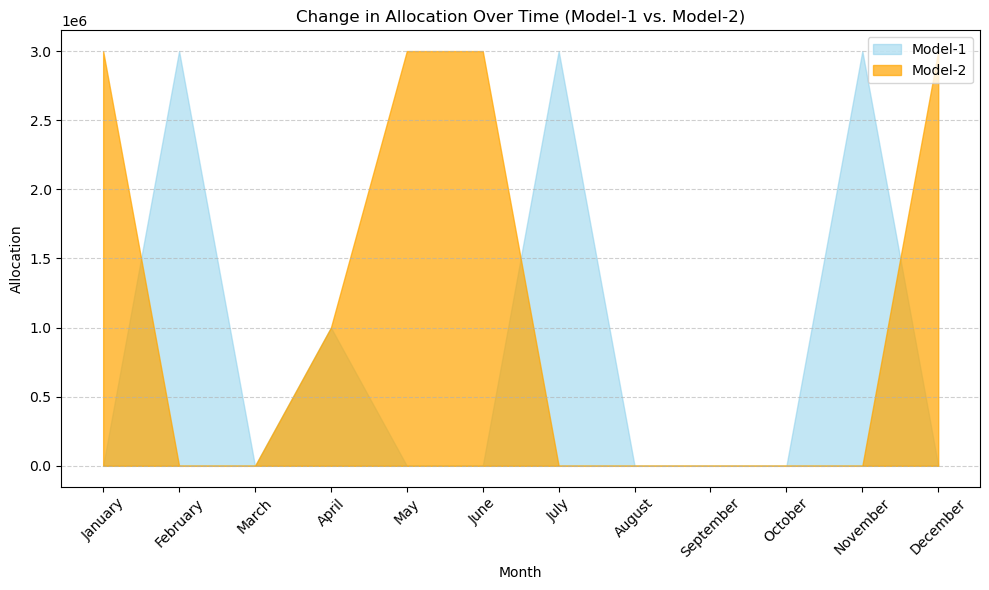

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace this with your actual data)
channels = output_df['Channel']
model_1 = output_df['Model-1']
model_2 = output_df['Model-2']
change = output_df['Change in allocation:']

df = pd.DataFrame(data)

# Create the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(df['Month'], df['Model-1'], color='skyblue', alpha=0.5, label='Model-1')
plt.fill_between(df['Month'], df['Model-2'], color='orange', alpha=0.7, label='Model-2')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Allocation')
plt.title('Change in Allocation Over Time (Model-1 vs. Model-2)')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

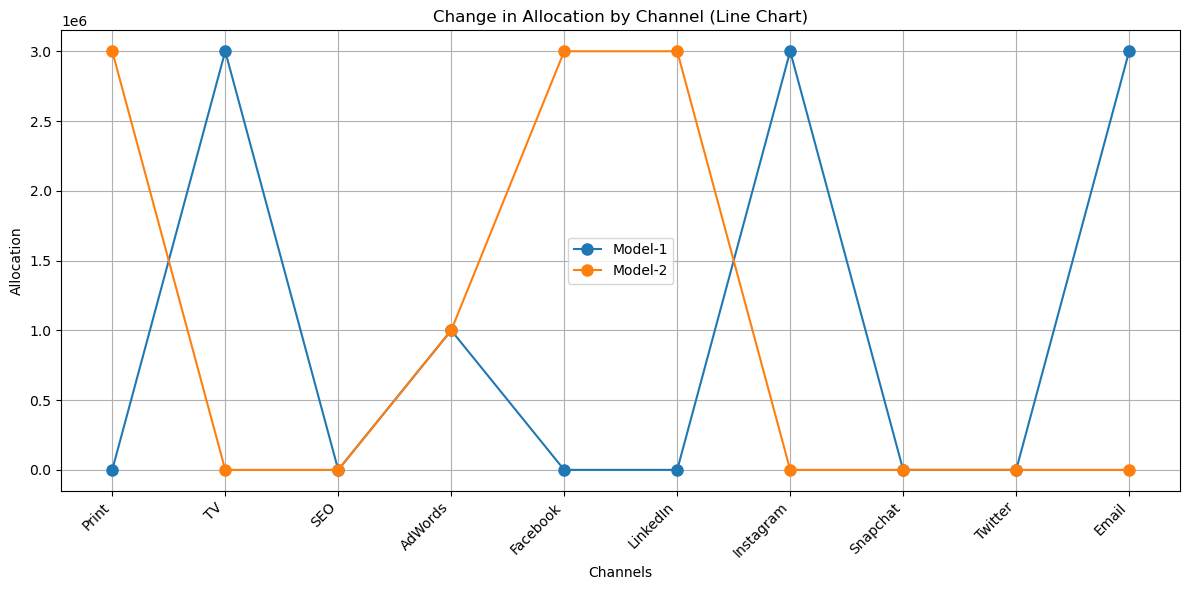

In [28]:
#Different representation of the above graph


import matplotlib.pyplot as plt
import numpy as np

# Extract data from the DataFrame
channels = output_df['Channel']
model_1 = output_df['Model-1']
model_2 = output_df['Model-2']
change = output_df['Change in allocation:']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Set the positions and width for bars
x = np.arange(len(channels))

# Initialize variables to keep track of cumulative changes
cumulative_change = 0
cumulative_changes = []

# Create lines for Model-1 and Model-2
for i in range(len(channels)):
    # Calculate the cumulative change
    cumulative_change += model_2[i] - model_1[i]
    cumulative_changes.append(cumulative_change)
    
# Create lines for Model-1 and Model-2
ax.plot(x, model_1, marker='o', label='Model-1', linestyle='-', markersize=8)
ax.plot(x, model_2, marker='o', label='Model-2', linestyle='-', markersize=8)

# Set labels, title, and legend
ax.set_xlabel('Channels')
ax.set_ylabel('Allocation')
ax.set_title('Change in Allocation by Channel (Line Chart)')
ax.set_xticks(x)
ax.set_xticklabels(channels, rotation=45, ha="right")
ax.legend()

# Display the graph
plt.tight_layout()
plt.grid(True)
plt.show()


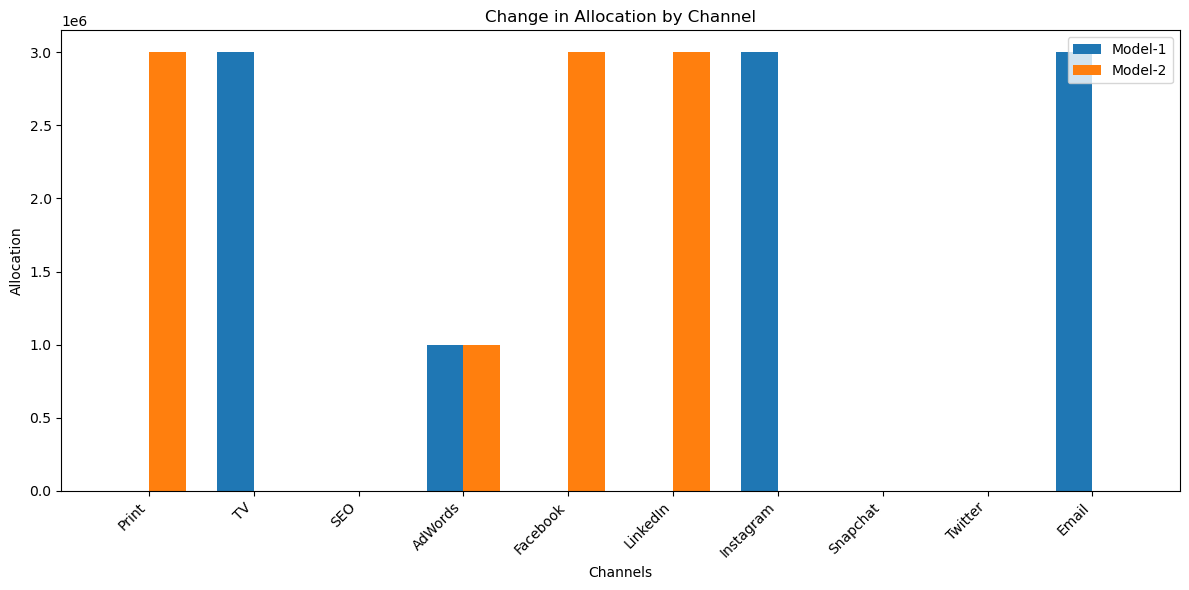

In [29]:
#Different representation of the above graph

import matplotlib.pyplot as plt
import numpy as np

# Extract data from the DataFrame
channels = output_df['Channel']
model_1 = output_df['Model-1']
model_2 = output_df['Model-2']
change = output_df['Change in allocation:']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Set the positions and width for bars
x = np.arange(len(channels))
width = 0.35

# Create bars for Model-1 and Model-2
rects1 = ax.bar(x - width/2, model_1, width, label='Model-1')
rects2 = ax.bar(x + width/2, model_2, width, label='Model-2')

# Set labels, title, and legend
ax.set_xlabel('Channels')
ax.set_ylabel('Allocation')
ax.set_title('Change in Allocation by Channel')
ax.set_xticks(x)
ax.set_xticklabels(channels, rotation=45, ha="right")
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

<strong>Question statement (Q5):</strong> Are the allocations the same? 


In [23]:
output_df #Leveraging this comparison table from the previous question

,Channel,Model-1,Model-2,Change in allocation:
0,Print,0.0,3000000.0,Decreased
1,TV,3000000.0,0.0,Increased
2,SEO,0.0,0.0,Remained Same
3,AdWords,1000000.0,1000000.0,Remained Same
4,Facebook,0.0,3000000.0,Decreased
5,LinkedIn,0.0,3000000.0,Decreased
6,Instagram,3000000.0,0.0,Increased
7,Snapchat,0.0,0.0,Remained Same
8,Twitter,0.0,0.0,Remained Same
9,Email,3000000.0,0.0,Increased


<div class="alert alert-block alert-primary">

<strong>Response :</strong>
    
<strong>Using Mod2 allocation with the original ROI data:</strong><br>
   
$$ \mathrm{Objective} = \sum_{i=0}^{9} \mathrm{roi}_1[i] * \mathrm{Mod2X}[i] $$

<strong>Optimal value of the objective function:</strong><br>
    
$$ 
\begin{aligned}
& ( 0.031 * 3 ) + ( 0.049 * 0 ) + ( 0.024 * 0 ) + ( 0.039 * 1 ) + ( 0.016 * 3 ) + ( 0.024 * 3 ) + ( 0.046 * 0 ) + ( 0.026 * 0 )  + ( 0.033 * 0 ) + ( 0.044 * 0 ) \\
& = 0.093 + 0 + 0 + 0.039 + 0.048 + 0.072 + 0 + 0 + 0 + 0 \\
& = 0.252\text{M}
\end{aligned}
$$




<br>
    
The difference from the optimal objective for Mod1 i.e. 0.456M is:<br><br>
$$ \mathbf{0.456M} - \mathbf{0.252M} = \mathbf{0.204M} $$


<strong>Using Mod1 allocation with ROI data from the second firm:</strong><br>

$$ \mathrm{Objective} = \sum_{i=0}^{9} \mathrm{roi}_2[i] * \mathrm{Mod1X}[i] $$


<strong>Optimal value of the objective function:</strong><br>
    
$$
\begin{aligned}
& ( 0.049 * 0 ) + ( 0.023 * 3 ) + ( 0.024 * 0 ) + ( 0.039 * 1 ) + ( 0.044 * 0 ) + ( 0.046 * 0 ) + ( ( 0.026 * 3 ) + ( 0.019 * 0 ) + ( 0.037 * 0 ) + ( 0.026 * 3 ) \\
& = 0 + 0.069 + 0 + 0.039 + 0 + 0 + 0.078 + 0 + 0 + 0.078 \\
& = 0.264\text{M}
\end{aligned}
$$

<br>

The difference from the optimal objective for Mod2 i.e. 0.46M is: <br>
    
$$ \mathbf{0.456M} - \mathbf{0.264M} = \mathbf{0.192M} $$

<div class="alert alert-block alert-info">

<strong>Question statement (Q5):</strong> 
 Do you think the third constraint above, based on your boss’ experience, is useful?
    


Lets find this out by removing the 3rd constraint and examining the overall values to come to conclusion

<strong>Case 1: Considering first ROI</strong>

In [9]:
ojMod4=gp.Model()
# the variables will be used in the objective and constraints
ojModX4 = ojMod4.addMVar(10) # tell the model how many variables there are

objcoeff = [0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044] #Do not hard code these!


# using the decision variables, input the objective
ojMod4.setObjective(gp.quicksum(ojModX4[i]*objcoeff[i] for i in range(10)),sense=gp.GRB.MAXIMIZE)

# first create an empty list that has as many entries as there are constraints
conlist=[0]*3
# then come back and change the list entries one by one to represent each constraint
conlist[0] = ojMod4.addConstr(gp.quicksum(ojModX4[i] for i in range(10)) <= 10)
conlist[1] = ojMod4.addConstr(ojModX4[0]+ojModX4[1]-ojModX4[4]-ojModX4[9] <= 0)
conlist[2] = ojMod4.addConstr(ojModX4[4]+ojModX4[5]+ojModX4[6]+ojModX4[7]-2*ojModX4[2]-2*ojModX4[3] >= 0)

ojMod4.Params.OutputFlag = 0 #tell gurobi to shut up!!

ojMod4.optimize() # solve the model

output2_df = pd.DataFrame(columns=["Channel", "Allocation"])

for i in range(10):
    channel = channel_list[i]
    allocation_value = (ojModX4[i].x)*1000000
    output2_df=output2_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)



output2_df


/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh0000gn/T/ipykernel_80251/4134205531.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output2_df=output2_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)
/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh0000gn/T/ipykernel_80251/4134205531.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output2_df=output2_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)
/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh0000gn/T/ipykernel_80251/4134205531.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output2_df=output2_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)
/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh000

,Channel,Allocation
0,Print,0.0
1,TV,5000000.0
2,SEO,0.0
3,AdWords,0.0
4,Facebook,0.0
5,LinkedIn,0.0
6,Instagram,0.0
7,Snapchat,0.0
8,Twitter,0.0
9,Email,5000000.0


In [10]:
#print the optimal objective value
print(f"Optimal objective value from the model using first set of ROI: ${ojMod4.objVal*1000000:.3f}M")

Optimal objective value from the model using first set of ROI: $465000.000M


<strong>Case 2: Considering second ROI</strong>

In [11]:
ojMod5=gp.Model()
# the variables will be used in the objective and constraints
ojModX5 = ojMod5.addMVar(10) # tell the model how many variables there are

objcoeff2 = [0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026] #Do not hard code these!


# using the decision variables, input the objective
ojMod5.setObjective(gp.quicksum(ojModX5[i]*objcoeff[i] for i in range(10)),sense=gp.GRB.MAXIMIZE)

# first create an empty list that has as many entries as there are constraints
conlist=[0]*3
# then come back and change the list entries one by one to represent each constraint
conlist[0] = ojMod5.addConstr(gp.quicksum(ojModX5[i] for i in range(10)) <= 10)
conlist[1] = ojMod5.addConstr(ojModX5[0]+ojModX5[1]-ojModX5[4]-ojModX5[9] <= 0)
conlist[2] = ojMod5.addConstr(ojModX5[4]+ojModX5[5]+ojModX5[6]+ojModX5[7]-2*ojModX5[2]-2*ojModX5[3] >= 0)

ojMod5.Params.OutputFlag = 0 #tell gurobi to shut up!!

ojMod5.optimize() # solve the model

output3_df = pd.DataFrame(columns=["Channel", "Allocation"])

for i in range(10):
    channel = channel_list[i]
    allocation_value = (ojModX4[i].x)*1000000
    output3_df=output3_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)



output3_df

/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh0000gn/T/ipykernel_80251/3862819227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output3_df=output3_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)
/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh0000gn/T/ipykernel_80251/3862819227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output3_df=output3_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)
/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh0000gn/T/ipykernel_80251/3862819227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output3_df=output3_df.append({"Channel": channel, "Allocation": allocation_value},ignore_index=True)
/var/folders/ct/hw29rfwj1750jvr0r2yj3dnh000

,Channel,Allocation
0,Print,0.0
1,TV,5000000.0
2,SEO,0.0
3,AdWords,0.0
4,Facebook,0.0
5,LinkedIn,0.0
6,Instagram,0.0
7,Snapchat,0.0
8,Twitter,0.0
9,Email,5000000.0


In [12]:
#print the optimal objective value
print(f"Optimal objective value from the model using first set of ROI: ${ojMod5.objVal*1000000:.3f}M")

Optimal objective value from the model using first set of ROI: $465000.000M


In [21]:
print("For the first allocation, if we remove the third constraint, we can see that removing the 3rd contraint would give us", \
    (ojMod4.ObjVal - ojMod1.ObjVal)*1000000,"dollars additional.")

print("\n")

print("For the second allocation, if we remove the third constraint, we can see that removing the 3rd contraint would give us", \
    (ojMod5.ObjVal - ojMod2.ObjVal)*1000000,"dollars additional.")

For the first allocation, if we remove the third constraint, we can see that removing the 3rd contraint would give us 8999.999999999896 dollars additional.


For the second allocation, if we remove the third constraint, we can see that removing the 3rd contraint would give us 8999.999999999896 dollars additional.


<div class="alert alert-block alert-info">

<strong>Question statement (Q6):</strong> To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [22]:
for i in ojMod1.getVars():
    print(f"{i.varName}: Lower Bound is {i.SAObjLow} and Upper Bound is {i.SAObjUp}")

C0: Lower Bound is -inf and Upper Bound is 0.049
C1: Lower Bound is 0.039 and Upper Bound is 0.062
C2: Lower Bound is -inf and Upper Bound is 0.039
C3: Lower Bound is 0.033 and Upper Bound is 0.046
C4: Lower Bound is -inf and Upper Bound is 0.028999999999999998
C5: Lower Bound is -inf and Upper Bound is 0.039
C6: Lower Bound is 0.039 and Upper Bound is inf
C7: Lower Bound is -inf and Upper Bound is 0.039
C8: Lower Bound is -inf and Upper Bound is 0.039
C9: Lower Bound is 0.028999999999999998 and Upper Bound is inf


<div class="alert alert-block alert-info">

<strong>Question statement (Q7):</strong> Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = $10.2M. The monthly ROI for next year is given in an attached csv file. The three constraints given by your boss are still in place for each month. What is the optimal allocation for each month?

In [31]:
roi_df = pd.read_csv('roi_mat.csv').rename(columns={'Unnamed: 0': 'Month'})
display(roi_df)

,Month,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [32]:
initial_budget = 10
budget=initial_budget

month_df = pd.DataFrame({'Channel': channel_list})

# List to store the month names
month_names = []

for i in range(12):
    # Extract the month name from the roi_df DataFrame
    month_name = str(roi_df.iloc[i, 0])
    month_names.append(month_name)

    print('The allocation for the month of ' + month_name + ' is $' + str(round(budget, 2)) + ' Millions')

    ojMod = gp.Model()  # create an empty gurobi model
    ojModX3 = ojMod.addMVar(10, ub=3)  # we declared the no. of decision variables along with objective and constraints
    coeff = list(roi_df.iloc[i, 1:])
   
    #objective function
    ojMod.setObjective(gp.quicksum((ojModX3[j] * coeff[j] / 100) for j in range(10)), sense=gp.GRB.MAXIMIZE)
    
    #Constraints
    conlist = [0] * 3
    conlist[0] = ojMod.addConstr(gp.quicksum(ojModX3[i] for i in range(10)) <= budget)
    conlist[1] = ojMod.addConstr(ojModX3[0] + ojModX3[1] - ojModX3[4] - ojModX3[9] <= 0)
    conlist[2] = ojMod.addConstr(ojModX3[4] + ojModX3[5] + ojModX3[6] + ojModX3[7] + ojModX3[8] - 2 * ojModX3[2] - 2 * ojModX3[3] >= 0)
    
    ojMod.Params.OutputFlag = 0
    ojMod.optimize()
    
    budget = initial_budget + 0.5 * ojMod.objVal
    allocation = ojModX3.x  # Appending each column in the month_df

    # Append the allocation values to the month_df DataFrame
    month_df[month_name] = allocation

# Print the DataFrame with allocation values for each month
month_df


The allocation for the month of January is $10 Millions
The allocation for the month of February is $10.19 Millions
The allocation for the month of March is $10.2 Millions
The allocation for the month of April is $10.2 Millions
The allocation for the month of May is $10.2 Millions
The allocation for the month of June is $10.21 Millions
The allocation for the month of July is $10.21 Millions
The allocation for the month of August is $10.21 Millions
The allocation for the month of September is $10.22 Millions
The allocation for the month of October is $10.2 Millions
The allocation for the month of November is $10.19 Millions
The allocation for the month of December is $10.22 Millions


,Channel,January,February,March,April,May,June,July,August,September,October,November,December
0,Print,3.000000,3.0000,0.000000,0.000000,1.200168,3.000000,0.000000,2.714132,0.609498,0.000000,3.000000,3.000000
1,TV,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.110404
2,SEO,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,AdWords,1.333333,2.3955,3.000000,3.000000,0.000000,0.000000,3.000000,1.500000,3.000000,3.000000,1.185722,0.000000
4,Facebook,0.000000,3.0000,0.000000,0.000000,0.000000,0.000000,1.211905,0.000000,0.000000,0.000000,0.000000,3.000000
5,LinkedIn,0.000000,0.0000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000
6,Instagram,2.666667,0.0000,1.203148,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,3.000000,3.000000,0.000000
7,Snapchat,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Twitter,0.000000,1.7910,3.000000,1.203758,3.000000,1.205503,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000
9,Email,3.000000,0.0000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.609498,1.201356,3.000000,2.110404


In [33]:
#To keep it consistent with our previous output of the tabl, Lets transpose this
month2_df = month_df.set_index('Channel').T
month2_df

Channel,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000
February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000
March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.203148,0.0,3.000000,0.000000
April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.203758,0.000000
May,1.200168,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000
June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.205503,3.000000
July,0.000000,0.000000,0.0,3.000000,1.211905,0.0,3.000000,0.0,3.000000,0.000000
August,2.714132,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000
September,0.609498,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.609498
October,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,0.000000,1.201356


<div class="alert alert-block alert-info">

<strong>Question statement (Q8):</strong> A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?

In [34]:
# Calculate the monthly change in spend for each platform
monthly_change = month2_df.diff().abs()
monthly_change

Channel,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,0.000000,0.000000,0.0,1.062167,3.000000,0.0,2.666667,0.0,1.791000,3.000000
March,3.000000,0.000000,0.0,0.604500,3.000000,3.0,1.203148,0.0,1.209000,0.000000
April,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.796852,0.0,1.796242,0.000000
May,1.200168,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,1.796242,3.000000
June,1.799832,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.794497,0.000000
July,3.000000,0.000000,0.0,3.000000,1.211905,0.0,0.000000,0.0,1.794497,3.000000
August,2.714132,0.000000,0.0,1.500000,1.211905,0.0,3.000000,0.0,0.000000,3.000000
September,2.104634,0.000000,0.0,1.500000,0.000000,3.0,0.000000,0.0,0.000000,2.390502
October,0.609498,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,0.591858


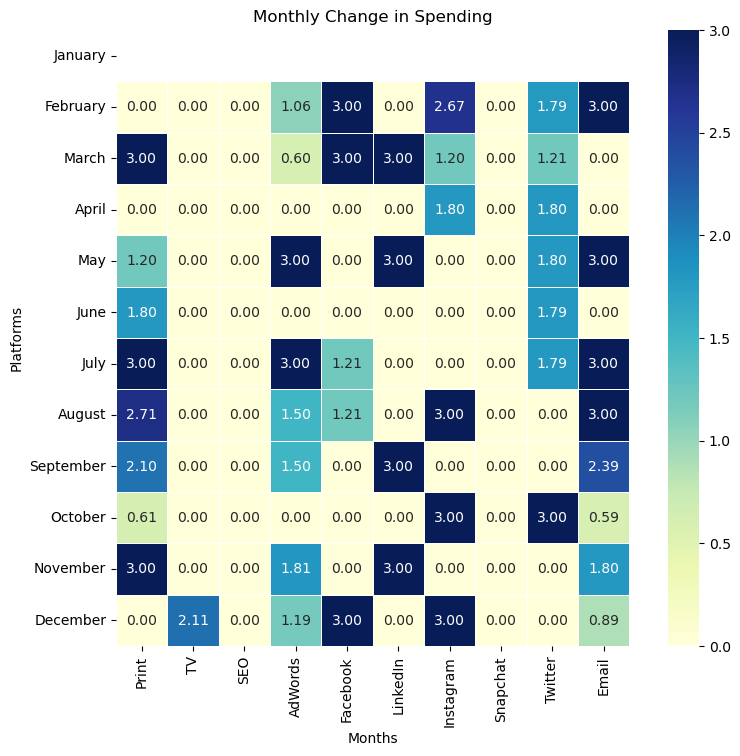

In [35]:
#We created a heatmap to understand where the differences are for month-on-month basis
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(monthly_change, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, square=True)

# Add labels and title
plt.xlabel("Months")
plt.ylabel("Platforms")
plt.title("Monthly Change in Spending")

# Show the heatmap
plt.show()


In [36]:
# Find where the. onthy difference exceeds $1M
more_than_1M_df = (monthly_change > 1).astype(int)
more_than_1M_df

Channel,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,0,0,0,0,0,0,0,0,0,0
February,0,0,0,1,1,0,1,0,1,1
March,1,0,0,0,1,1,1,0,1,0
April,0,0,0,0,0,0,1,0,1,0
May,1,0,0,1,0,1,0,0,1,1
June,1,0,0,0,0,0,0,0,1,0
July,1,0,0,1,1,0,0,0,1,1
August,1,0,0,1,1,0,1,0,0,1
September,1,0,0,1,0,1,0,0,0,1
October,0,0,0,0,0,0,1,0,1,0


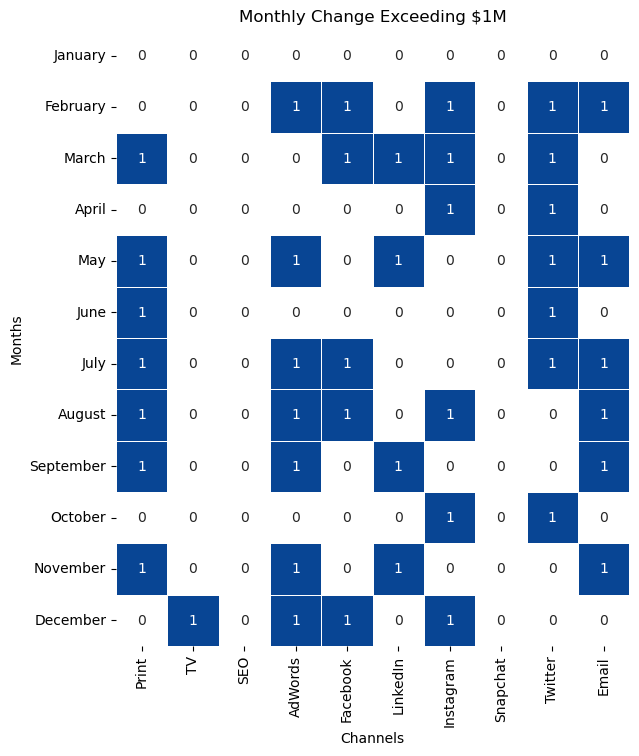

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom colormap with blue for 1 and white for other values
cmap = sns.color_palette(["#ffffff", "#084594"])  # White and dark blue

# Create a heatmap with the custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(more_than_1M_df, cmap=cmap, annot=True, fmt=".0f", linewidths=0.5, square=True, cbar=False)

# Add labels and title
plt.xlabel("Channels")
plt.ylabel("Months")
plt.title("Monthly Change Exceeding $1M")

# Show the heatmap
plt.show()
